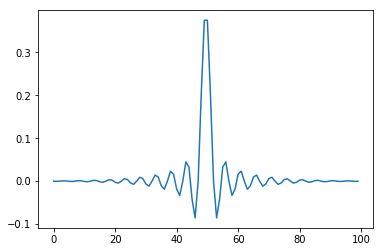

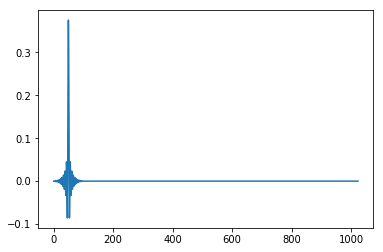

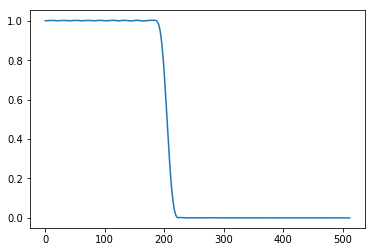

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


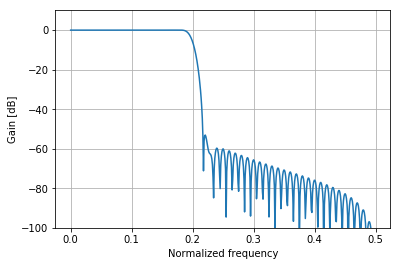

In [10]:
import numpy as np
import matplotlib.pyplot as plt
 
fc = 0.2  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
N = 100   # Number of coefficients.
L = 1024  # Length of frequency response.
 
# Compute sinc filter with Hamming window.
n = np.arange(N)
h = np.sinc(2 * fc * (n - (N - 1) / 2)) * np.hamming(N)
h /= np.sum(h)
plt.plot(h)
plt.show()
 
# Pad filter with zeros.
h_padded = np.zeros(L)
h_padded[0 : N] = h
plt.plot(h_padded)
plt.show()
 
# Compute frequency response; only keep first half.
H = np.abs(np.fft.fft(h_padded))[0 : L // 2 + 1]
plt.plot(H)
plt.show()
 
# Plot frequency response (in dB).
plt.figure()
plt.plot(np.linspace(0, 0.5, len(H)), 20 * np.log10(H))
plt.xlabel('Normalized frequency')
plt.ylabel('Gain [dB]')
plt.ylim([-100, 10])
plt.grid()
plt.show()

In [25]:

#comparison with my other method

def fir_filter(signal, B):   
    output = np.zeros(len(signal))
    for N in range(len(B), len(signal)):
        for K in range(len(B)):
            output[N] += B[K] * signal[N - K]
    return output

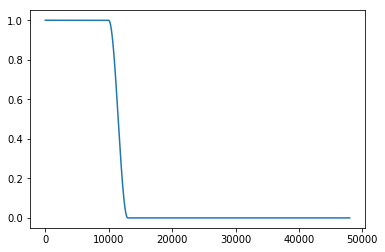

In [26]:
window =np.append(np.full(10000, 1), np.hanning(6000)[3000:])
window =np.append(window, np.full(48000-13000, 0))
plt.plot(window)
plt.show()

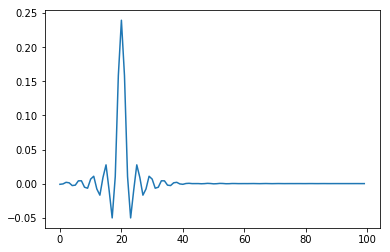

In [27]:
i_r = np.fft.ifft(window)
i_r = np.append(i_r[len(i_r)-20:], i_r[:len(i_r)-20])
plt.plot(i_r[:100])
plt.show()

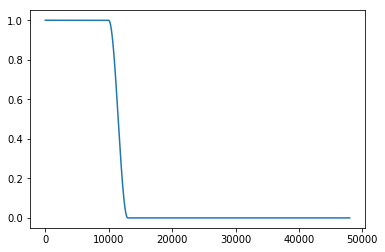

In [28]:
#rotate and 0-padd

f_r = np.abs(np.fft.fft(i_r))
plt.plot(f_r)
plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


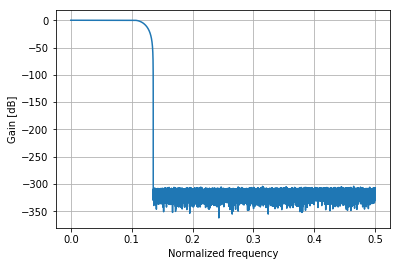

In [30]:
# Plot frequency response (in dB).
plt.figure()
plt.plot(np.linspace(0, 0.5, len(f_r)), 20 * np.log10(f_r))
plt.xlabel('Normalized frequency')
plt.ylabel('Gain [dB]')
#plt.ylim([-100, 10])
plt.grid()
plt.show()